# K-Means Clustering on customers Dataset.

## Importing the libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Importing the datasets.

In [2]:
df = pd.read_csv('Customers.csv')

## Exploratory Data Analysis.

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Feature Engineering.

1) Dropping CustomerID column

In [8]:
df.drop('CustomerID',axis = 1,inplace = True)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## 2) Converting categorical variable to numerical variable.

In [9]:
print('Unique values in Genre',df['Genre'].unique())
df['Genre'] = pd.get_dummies(df['Genre'],drop_first=True)

Unique values in Genre ['Male' 'Female']


In [10]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [18]:
#default global variables
col1_ind = 2
col2_ind = 3
colors = ['red','green','blue','brown','orange','purple','magenta','yellow','gray','violet']

## Function to plot elbow graph.

By looking at this graph we can decide the suitable k-value

In [19]:
def elbow_plot(X):
    #selecting k value for k-means-clustering 
    wcss = []
    for i in range(1,11):
        model = KMeans(n_clusters = i,random_state = 0)
        model.fit(X)
        wcss.append(model.inertia_)
        
    #drawing elbow plot    
    plt.plot(range(1,11),wcss)
    plt.xlabel('K- values -->')
    plt.ylabel('Error')
    plt.title('Elbow plot')
    plt.show()

## Function used to visualize the clusters.

In [20]:
def visualize_clusters(model,X,k_pred,k_value):
    
    #plots all the clusters
    for i in range(k_value):
        #plotting individual clusters one by one
        plt.scatter(X[k_pred==i,0],X[k_pred==i,1],s = 50,c=colors[i])
        
    #plotting the centroids
    plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 100,c = 'black')

    #giving labels and titles
    plt.xlabel(df.columns[col1_ind])
    plt.ylabel(df.columns[col2_ind])
    plt.title('Clusters')
    plt.legend(range(k_value))
    plt.show()

## Main Clustering Function.

In [21]:
#This function expects two indexes (column names) using which clustering is done
def clustering(ind1 = 2,ind2 = 3):
    #initializing global variables
    global col1_ind,col2_ind
    col1_ind = ind1
    col2_ind = ind2
    X = df.iloc[:,[col1_ind,col2_ind]].values
    
    #call elbow plot
    elbow_plot(X)
    
    #default k_value
    k_value = 5
    try:
        #after visualizing the elbow plot asking user to manually enter the k-value
        k_value = int(input('Enter suitable value for k from the above graph  '))
        
    except:
        print('Using default k-value = 5')
    
    #creating clustering model
    model = KMeans(n_clusters=k_value,random_state=0)
    k_pred = model.fit_predict(X)
    
#     print('centroids------> \n',model.cluster_centers_)
#     print()
    
    #function to visualize the clustering
    visualize_clusters(model,X,k_pred,k_value)

In [16]:
#these are the columns
print(df.columns)

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


## 1) Clustering based on 'Annual Income (k)' and 'Spending Score (1-100)' features.

D:\User\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


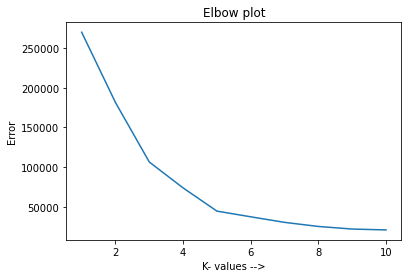

Enter suitable value for k from the above graph  5


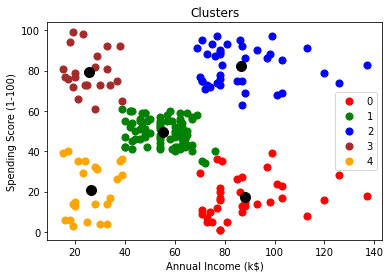

In [22]:
#indexes for 'Annual Income' and 'Spending Score' are 2 and 3 respectively
clustering(2,3)

### Observation from the above graph

k-value selected is 5 that means 5 clusters

There are 2 groups of people earning between 10-40 dollors

    One with low spending score (i.e., 0-40). These people below to Low earning Low spending group

    One with high spending score (i.e., 60-100). These people below to Low earning High spending group

There are 2 groups of people earning between 70-140 dollors

    One with low spending score (i.e., 0-40). These people below to High earning Low spending group

    One with high spending score (i.e., 60-100). These people below to High earning High spending group

There is one group of people earning between 40-70 dollars

    These people have moderate spending score (i.e.,40-60)

## 2) Clustering based on 'Age' and 'Spending Score (1-100)' features.

D:\User\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


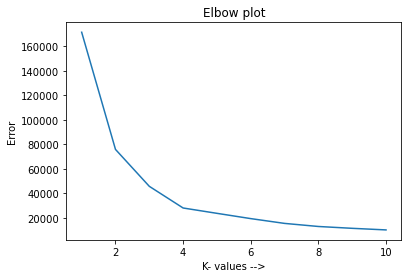

Enter suitable value for k from the above graph  4


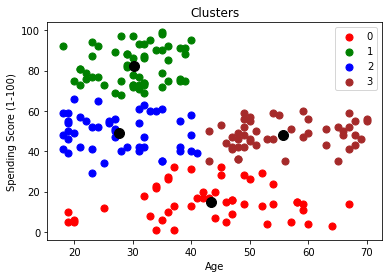

In [23]:
#indexes for 'Age' and 'Spending Score (1-100)' are 1 and 3 respectively
clustering(1,3)

### Observation from the above graph.

k-value selected is 4 that means 4 clusters.

There are 2 groups of people which belongs to the age group 15-40 years.

    One with moderate spending score (i.e., 40-65). These are the youths who are spending Moderately
    
    One with high spending score (i.e., 65-100). These are youths who are spending More
    
There is 1 group of people which belongs to the age group of 45-70 years with moderate spending score (i.e., 40-65).

There is 1 group of people regardless of any age, with low spending score (i.e., 0-35).

## 3) Clustering based on 'Age' and 'Annual Income' features.

D:\User\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


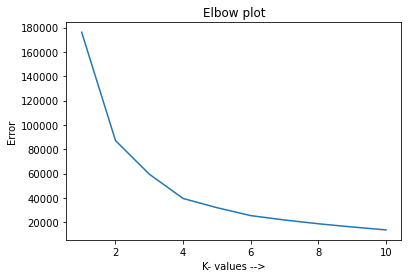

Enter suitable value for k from the above graph  4


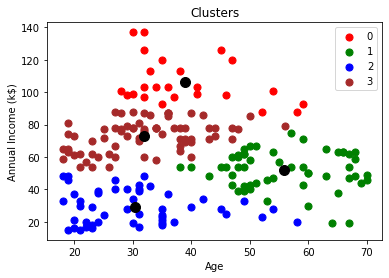

In [24]:
#indexes for 'Age' and 'Annual Income' are 1 and 2 respectively
clustering(1,2)